In [1]:
import numpy as np
from generate_mpqp_v2 import generate_qp, generate_rhs
import matplotlib.pyplot as plt
import matplotlib

In [2]:
## Example
import daqp
import numpy as np
from ctypes import *
import ctypes.util

H = np.array([[2, 1], [1, 2]],dtype=c_double)
f = np.array([-4, -8],dtype=c_double)
A = np.array([[1, 1], [-1, 2]],dtype=c_double)
b = np.array([3,0],dtype=c_double)
bupper = np.array([3,0],dtype=c_double)
blower= np.array([-np.inf,-np.inf],dtype=c_double)
sense = np.array([0,0],dtype=c_int)

x,fval,exitflag,info = daqp.solve(H,f,A,bupper,blower,sense)
print("Optimal solution:")
print(x)
print(fval)
print("Exit flag:",exitflag)
print("Info:",info)

Optimal solution:
[2. 1.]
-9.0
Exit flag: 1
Info: {'solve_time': 6.5e-06, 'setup_time': 1.82e-05, 'iterations': 3, 'nodes': 1, 'lam': array([0.66666667, 1.66666667])}


C:\Users\Ellaa\AppData\Local\Temp\ipykernel_2280\4278978475.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, y1, 'r-', label=r'$x + y \leq 3$',color = "black",lw =0.6)
C:\Users\Ellaa\AppData\Local\Temp\ipykernel_2280\4278978475.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x2, y2, 'b-', label=r'$x - 2y \leq 0$',color = "black",lw=0.6)


[0. 4.]


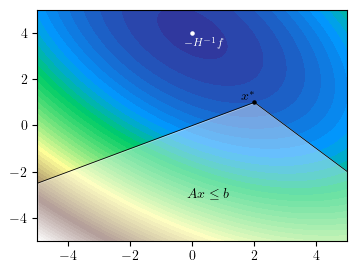

In [3]:
# Primal QP figure

# Enable LaTeX rendering
matplotlib.rcParams['text.usetex'] = True

# Define the quadratic function
def quadratic(x, y):
    return x**2 + y**2 +x*y-4*x-8*y

# Generate x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = quadratic(X, Y)

plt.figure(figsize=(4, 3))
contour = plt.contourf(X, Y, Z, levels=50, cmap='terrain')

# Define constraints: x + y <= 3 and x - 2y <= 0
x_vals = np.linspace(-5, 5, 100)
x1 = np.linspace(2, 5, 30)
x2 = np.linspace(-5, 2, 70)
y1 = 3 - x1
y2 = x2 / 2
def y_both(x):
    y1 = 3 - x
    y2 = x / 2 
    return np.minimum(y2, np.minimum(y1, 5))
y_3 = y_both(x_vals)   
    
# Plot constraint lines
plt.plot(x1, y1, 'r-', label=r'$x + y \leq 3$',color = "black",lw =0.6)
plt.plot(x2, y2, 'b-', label=r'$x - 2y \leq 0$',color = "black",lw=0.6)

# unconstraint optimal value 
middle_point = -np.linalg.inv(H)@f
print(middle_point)
plt.scatter(middle_point[0],middle_point[1],color = "white", s = 5)
plt.text(middle_point[0]+1, middle_point[1]-0.2, r'$-H^{-1}f$', fontsize=8, color='white', ha='right', va='top')

# Shade the feasible region
plt.fill_between(x, y_3, -5, color='white', alpha=0.4)
plt.text(0.5, -3, r'$Ax\leq b$', fontsize=10, color='black', ha='center', va='center')

# constraint optimal value
plt.scatter(2,1,color = "black", s = 5)

plt.text(2, 1, r'$x^*$', fontsize=10, color='black', ha='right', va='bottom')

# Labels

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

C:\Users\Ellaa\AppData\Local\Temp\ipykernel_2280\1887615345.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, y1, 'r-', label=r'$x + y \leq 3$',color = "black",lw =0.6)
C:\Users\Ellaa\AppData\Local\Temp\ipykernel_2280\1887615345.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x2, y2, 'b-', label=r'$x - 2y \leq 0$',color = "black",lw=0.6)
C:\Users\Ellaa\AppData\Local\Temp\ipykernel_2280\1887615345.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot([0,0], [-3,0], 'b-', color = "red",lw=0.8)
C:\Users\Ellaa\AppData\Local\Temp\ipykernel_2280\1887615345.py:59: UserWarning: color is redundantly defined by the 'color' ke

[0. 4.]


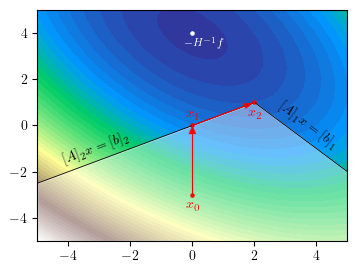

In [4]:
# Figure: Steps to solve primal QP

# Enable LaTeX rendering
matplotlib.rcParams['text.usetex'] = True

# Define the quadratic function
def quadratic(x, y):
    return x**2 + y**2 +x*y-4*x-8*y

# Generate x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = quadratic(X, Y)

plt.figure(figsize=(4, 3))
contour = plt.contourf(X, Y, Z, levels=50, cmap='terrain')

# Define constraints: x + y <= 3 and x - 2y <= 0
x_vals = np.linspace(-5, 5, 100)
x1 = np.linspace(2, 5, 30)
x2 = np.linspace(-5, 2, 70)
y1 = 3 - x1
y2 = 0.5*x2
def y_both(x):
    y1 = 3 - x
    y2 = x / 2 
    return np.minimum(y2, np.minimum(y1, 5))
y_3 = y_both(x_vals)   
    
# Plot constraint lines
plt.plot(x1, y1, 'r-', label=r'$x + y \leq 3$',color = "black",lw =0.6)
plt.text(x1[7], y1[7]-0.3, s=r'$[A]_1x = [b]_1$', fontsize=10, color='black', ha='left', va='center',rotation=-37)
plt.plot(x2, y2, 'b-', label=r'$x - 2y \leq 0$',color = "black",lw=0.6)
plt.text(x2[30], y2[30], s=r'$[A]_2x = [b]_2$', fontsize=10, color='black', ha='right', va='center',rotation=20)


# unconstraint optimal value 
middle_point = -np.linalg.inv(H)@f
print(middle_point)
plt.scatter(middle_point[0],middle_point[1],color = "white", s = 5)
plt.text(middle_point[0]+1, middle_point[1]-0.2, r'$-H^{-1}f$', fontsize=8, color='white', ha='right', va='top')

# Shade the feasible region
plt.fill_between(x, y_3, -5, color='white', alpha=0.4)

# constraint optimal value
# plt.scatter(2,1,color = "black", s = 5)
# plt.text(2, 1, r'$x^*$', fontsize=10, color='black', ha='right', va='bottom')

# Steps
plt.scatter(0,-3,color = "red", s = 5)
plt.text(0, -3-0.2, r'$x_0$', fontsize=10, color='red', ha='center', va='top')
plt.plot([0,0], [-3,0], 'b-', color = "red",lw=0.8)
plt.arrow(0, -1.5, 0,1.5, shape='full', lw=0, length_includes_head=True, head_width=.25,color = "red")

plt.scatter(0,0,color = "red", s = 5)
plt.text(0, 0+0.2, r'$x_1$', fontsize=10, color='red', ha='center', va='bottom')
plt.plot([0,2], [0,1], 'b-', color = "red",lw=0.8)
plt.arrow(0, 0, 2,1, shape='full', lw=0, length_includes_head=True, head_width=.25,color = "red")

plt.scatter(2,1,color = "red", s = 5)
plt.text(2, 1-0.2, r'$x_2$', fontsize=10, color='red', ha='center', va='top')
# Labels
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

## Dual

In [5]:
R = np.linalg.cholesky(H, upper = True)
print(R)

[[1.41421356 0.70710678]
 [0.         1.22474487]]


In [6]:
A.T@np.linalg.inv(H)@A

array([[ 2., -1.],
       [-1.,  2.]])

In [7]:
(b-A@np.linalg.inv(H)@f).T

array([7., 8.])

In [8]:
M = A@np.linalg.inv(R)
print(M)

v = np.linalg.inv(R).T @ f
print(v)

d = b+ M@v
print(d)

M@M.T
print(M@M.T)

[[ 0.70710678  0.40824829]
 [-0.70710678  2.04124145]]
[-2.82842712 -4.89897949]
[-1. -8.]
[[0.66666667 0.33333333]
 [0.33333333 4.66666667]]


In [9]:
# "-H^-1f" - optimal dual solution
(-A.T@np.linalg.inv(H)@A)@(b-A@np.linalg.inv(H)@f)

array([-6., -9.])

In [10]:
import numpy as np
from scipy.optimize import fsolve

# Define the system of equations
def system(lam):
    lam1, lam2 = lam
    eq1 = 2/3*lam1 - 1/3*lam2 -1
    eq2 = 1/3*lam1 +14/3*lam2-8
    return [eq1, eq2]

# Solve the system
initial_guess = [0, 0]  # Start with an initial guess of (0, 0)
solution = fsolve(system, initial_guess)

# Extract the values of lambda_1 and lambda_2
lam1_opt, lam2_opt = solution
print(f"Optimal values: λ1 = {lam1_opt}, λ2 = {lam2_opt}")

# Calculate the optimal function value
optimal_value = lam1_opt**2 + lam2_opt**2 - lam1_opt * lam2_opt + 7 * lam1_opt + 8 * lam2_opt
print(f"Optimal function value: {optimal_value}")


Optimal values: λ1 = 2.2758620689655173, λ2 = 1.5517241379310345
Optimal function value: 32.40071343638526


C:\Users\Ellaa\AppData\Local\Temp\ipykernel_2280\3842855515.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(zeros, y2, 'r-', label=r'$x + y \leq 3$',color = "white",lw =0.6)
C:\Users\Ellaa\AppData\Local\Temp\ipykernel_2280\3842855515.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_vals, zeros, 'b-', label=r'$x - 2y \leq 0$',color = "white",lw=0.6)


(-5.0, 5.0)

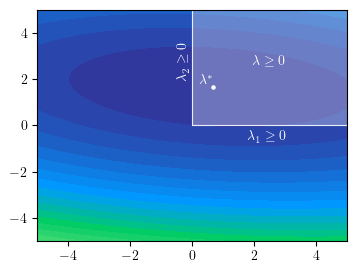

In [11]:
## dual 

# Define the quadratic function
def quadratic(lam1, lam2):
    return 1/3*lam1**2 + 7/3*lam2**2 +1/3*lam1*lam2-1*lam1-8*lam2

# Generate x and y values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = quadratic(X, Y)

plt.figure(figsize=(4, 3))
contour = plt.contourf(X, Y, Z, levels=50, cmap='terrain')

# Define constraints: x + y <= 3 and x - 2y <= 0
x_vals = np.linspace(0, 10, 100)
y1 = 0
y2 = x_vals
zeros = np.array([0 for i in x_vals])    
# Plot constraint lines
plt.plot(zeros, y2, 'r-', label=r'$x + y \leq 3$',color = "white",lw =0.6)
plt.text(-0.5, y2[30]-0.3, s=r'$\lambda_2 \geq 0$', fontsize=10, color='white', ha='left', va='center',rotation=90)
plt.plot(x_vals, zeros, 'b-', label=r'$x - 2y \leq 0$',color = "white",lw=0.6)
plt.text(x_vals[30], -0.5, s=r'$\lambda_1 \geq 0$', fontsize=10, color='white', ha='right', va='center',rotation=00)


# unconstraint optimal value 
# middle_point = [-22/3,-23/3]
# plt.scatter(middle_point[0],middle_point[1],color = "white", s = 5)
# plt.text(middle_point[0]+0.3, middle_point[1]-0.2, r'$\lambda_{unconstraint} $', fontsize=8, color='white', ha='left', va='top')

# Shade the feasible region
plt.fill_between(x_vals, y1, 10, color='white', alpha=0.3)
plt.text(3, 2.5, r'$\lambda \geq 0$', fontsize=10, color='white', ha='right', va='bottom')

# constraint optimal value
plt.scatter(2/3,5/3,color = "white", s = 5)
plt.text(2/3, 5/3, r'$\lambda^*$', fontsize=10, color='white', ha='right', va='bottom')


# Steps
# plt.scatter(0,0,color = "orange", s = 5)
# plt.text(0, 0-0.2, r'$\lambda_0$', fontsize=10, color='orange', ha='center', va='top')
# plt.plot([0,0], [0,1.714], 'b-', color = "orange",lw=0.8)
# plt.arrow(0, 0, 0,1.714, shape='full', lw=0, length_includes_head=True, head_width=.25,color = "orange")

# plt.scatter(0,1.714,color = "orange", s = 5)
# plt.text(0, 1.714+0.2, r'$\lambda_1$', fontsize=10, color='orange', ha='center', va='bottom')
# plt.plot([0,2/3], [1.714,5/3], 'b-', color = "orange",lw=0.8)
# plt.arrow(0, 2/3, 1.714,5/3, shape='full', lw=0, length_includes_head=True, head_width=.25,color = "orange")

# plt.scatter(2/3,5/3,color = "orange", s = 5)
# plt.text(2/3, 5/3-0.2, r'$\lambda_2$', fontsize=10, color='orange', ha='center', va='top')
# Labels
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# plt.show()


C:\Users\Ellaa\AppData\Local\Temp\ipykernel_2280\4239466370.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(zeros, y2, 'r-', label=r'$x + y \leq 3$',color = "white",lw =0.6)
C:\Users\Ellaa\AppData\Local\Temp\ipykernel_2280\4239466370.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_vals, zeros, 'b-', label=r'$x - 2y \leq 0$',color = "white",lw=0.6)
C:\Users\Ellaa\AppData\Local\Temp\ipykernel_2280\4239466370.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot([0,0], [0,1.714], 'b-', color = "orange",lw=0.8)
C:\Users\Ellaa\AppData\Local\Temp\ipykernel_2280\4239466370.py:41: UserWarning: color is redundantly defined b

(-5.0, 5.0)

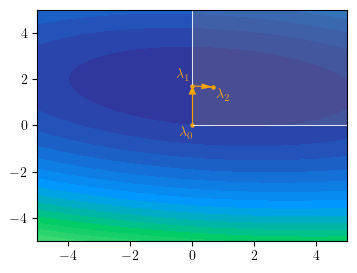

In [12]:
## dual 

# Define the quadratic function
def quadratic(lam1, lam2):
    return 1/3*lam1**2 + 7/3*lam2**2 +1/3*lam1*lam2-1*lam1-8*lam2

# Generate x and y values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = quadratic(X, Y)

plt.figure(figsize=(4, 3))
contour = plt.contourf(X, Y, Z, levels=50, cmap='terrain')

# Define constraints: x + y <= 3 and x - 2y <= 0
x_vals = np.linspace(0, 10, 100)
y1 = 0
y2 = x_vals
zeros = np.array([0 for i in x_vals])  
  
# Plot constraint lines
plt.plot(zeros, y2, 'r-', label=r'$x + y \leq 3$',color = "white",lw =0.6)
#plt.text(-0.5, y2[30]-0.3, s=r'$\lambda_1 \geq 0$', fontsize=10, color='white', ha='left', va='center',rotation=90)
plt.plot(x_vals, zeros, 'b-', label=r'$x - 2y \leq 0$',color = "white",lw=0.6)
#plt.text(x_vals[30], -0.5, s=r'$\lambda_2 \geq 0$', fontsize=10, color='white', ha='right', va='center',rotation=00)

    
# Shade the feasible region
plt.fill_between(x_vals, y1, 10, color='grey', alpha=0.3)


# Steps
plt.scatter(0,0,color = "orange", s = 5)
plt.text(0, 0-0.1, r'$\lambda_0$', fontsize=10, color='orange', ha='right', va='top')
plt.plot([0,0], [0,1.714], 'b-', color = "orange",lw=0.8)
plt.arrow(0, 0, 0,1.714, shape='full', lw=0, length_includes_head=True, head_width=.25,color = "orange")

plt.scatter(0,1.714,color = "orange", s = 5)
plt.text(0-0.1, 1.714+0.2, r'$\lambda_1$', fontsize=10, color='orange', ha='right', va='bottom')
plt.plot([0,2/3], [1.714,5/3], 'b-', color = "orange",lw=0.8)
plt.arrow(0, 1.714, 2/3,-1.714+5/3, shape='full', lw=0, length_includes_head=True, head_width=.25,color = "orange")

plt.scatter(2/3,5/3,color = "orange", s = 5)
plt.text(2/3+0.1, 5/3-0.1, r'$\lambda_2$', fontsize=10, color='orange', ha='left', va='top')
# Labels
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# plt.show()


In [13]:


## with print comments to debug

import sys
def is_invertible(A):
    return A.shape[0] == A.shape[1] and np.linalg.matrix_rank(A) == A.shape[0]

def fix_component(lam,lam_star,mu, W, B, p):
    print("run: fix component")
    print("B in fixed component",B)
    print("-lam[B]/p[B]",-lam[B]/p[B])
    j = np.argmin(-lam[B]/p[B])
    print("j",j)
    W_new = [int(i) for i in W if int(i)!=int(B[j])]
    print("W",W)
    #W_new = np.delete(W, B[j])
    print("new W", W_new)
    print("lam",lam)
    print("W[j]",W[j])
    print("(lam[B[j]]/p[B[j]])",(lam[B[j]]/p[B[j]]))
    lam = lam - (lam[B[j]]/p[B[j]])*p
    print("new lam",lam)
    lam_star[B[j]] = 0
    print("new lam_star")
    #mu[B[j]] = 0
    return lam,lam_star,mu, W_new          
            
    print("Done")
    
def daqp_self(H,f,A,b,sense,W):
    # transform matrices into M,d,v,R
    try:
        R = np.linalg.cholesky(H, upper = True)
    except:
        print("Invalid input")
        sys.exit()
    M = A @ np.linalg.inv(R)
    v = np.linalg.inv(R).T @f
    print("initial values")
    print("R",R,R.shape)
    print("M", M, M.shape)
    print("v", v,v.shape)
    print("b",b,b.shape)
    print("v", v,v.shape)
    d = b.reshape(-1) + M @ v
    print("d",d,d.shape)
    print("---------")
    # initial values
    lam = np.array([0 for i in range(len(b))],dtype=c_double)
    mu = np.array([0 for i in range(len(b))],dtype=c_double)
    lam_star =  np.array([0 for i in range(len(b))],dtype=c_double)
    
    print("initial lambda", lam)
    print("initial working set", W)
    print("mu",mu)
    iter = 0
    while True:
        if iter == 5:
            break
        iter += 1
        print("---------")
        print("Iteration",iter)
        W = np.sort(W)
        W = list(W)
        print("W",W, "len(W)", len(W))
        W_bar =  np.sort([x for x in range(len(lam)) if x not in W])
        print("W_bar", W_bar)
        print("mu at the beginning of the round",mu)
        p = np.array([0 for i in range(len(b))],dtype=c_double)
        if len(W)==0 or is_invertible(M[W]@ M[W].T): # step 2
            print("case: MkMkT invertible")
            print("lam_star",lam_star)
            print("lam",lam)
            print("len(W)",len(W))
            if len(W)>0:
                print("np.linalg.inv(M[W] @M[W].T)",np.linalg.inv(M[W,:] @M[W,:].T), (np.linalg.inv(M[W,:] @M[W,:].T)).shape)
                print("- np.linalg.inv(M[W] @M[W].T) @d[W]",- np.linalg.inv(M[W,:] @M[W,:].T) @d[W], (- np.linalg.inv(M[W,:] @M[W,:].T) @d[W]).shape)
                lam_star[W] = (- np.linalg.inv(M[W,:] @M[W,:].T) @d[W]) #.reshape(-1) # solve the system, step 3
            else:
                lam_star=np.array([0 for i in range(len(b))],dtype=c_double)
            print("lam",lam)
            print("lam_star",lam_star)
            if (np.array(lam_star) >= -1e-12).all(): # step 4
                print("case: all lam_star>=0")
                print("mu before update", mu)
                if len(W)>0:
                    if len(W_bar)>0: # constraints are split between W and W_bar
                        print("lam_star[W]",lam_star[W], lam_star[W].shape)
                        print("d[W_bar]",d[W_bar],d[W_bar].shape)
                        print(" M[W_bar] @M[W].T", M[W_bar,:] @M[W,:].T, (M[W_bar,:] @M[W,:].T).shape)
                        print("M[W_bar] @M[W].T@lam_star[W]",M[W_bar,:] @M[W,:].T@lam_star[W],(M[W_bar,:] @M[W,:].T@lam_star[W]).shape)
                        print("M[W_bar] @M[W].T@lam_star[W]+d[W_bar]",M[W_bar,:] @M[W,:].T@lam_star[W]+d[W_bar],(M[W_bar,:] @M[W,:].T@lam_star[W]+d[W_bar]).shape )
                        mu[W_bar] = M[W_bar,:] @M[W,:].T@lam_star[W]+d[W_bar]
                    else: # all constraints in W
                        print("case: all constraints in W")
                        print("CHECK THIS CASE")
                        mu = np.array([0 for i in range(len(b))],dtype=c_double)
                elif len(W)==0: # all constraints in W_bar
                    print("case: all constraints in W_bar")    
                    mu = np.copy(d)
                print("mu after update",mu)
                print("update lam now")
                print("mu",mu)
                lam = np.copy(lam_star) # optimum found ?
                print("lam",lam)
                if (np.array(mu) >= -1e-6).all(): # step 6
                    # optimum found
                    print("case: all mu >=0")
                    print("print all optimal values",R,M,lam_star, W,iter)
                    print("M[W,:]",M[W,:].shape)
                    print("lam_star[W]",lam_star[W].shape)
                    print("v",v.shape)
                    print("(M[W,:].T@lam_star[W]+v)",(M[W,:].T@lam_star[W]+v),(M[W,:].T@lam_star[W]+v).shape)
                    # problem: algorithm doesn't stop, when working set contains everything
                    return -np.linalg.inv(R)@(M[W,:].T@lam_star[W]+v), lam_star, W, iter
                else: # step 7
                    print("case: not all mu >=0")
                    print("mu_W_bar",mu[W_bar])
                    j = np.argmin(mu[W_bar])
                    print("j",W_bar[j])
                    W.append(int(W_bar[j]))
                    mu[j]=0
                    print("new W for next round",W)
            else:
                print("case: lam_star<0") # step 8
                print("lam_star",lam_star)
                print("lam",lam)
                p = lam_star-lam # step 9
                print("p",p)
                B = [i for i in W if lam_star[i]<1e-12]
                print("B",B)
                lam,lam_star,mu, W = fix_component(lam,lam_star,mu, W, B, p) # step 10
                print("lm_star",lam_star)
        else:
            print("W",W)
            print("M[W]",M[W,:])
            MM=Matrix(M[W,:] @ M[W,:].T) # step 12
            print("MM",MM)
            print("nullspace",MM.nullspace())
            nullspace = np.asarray(MM.nullspace()).reshape(-1)
            print("length of MM nullspace",len(nullspace))
            if len(nullspace)==0:
                p[W] = np.zeros((1,len(W)))
            else:
                for i in nullspace: #  (iterate over potential vectors in the nullspace)
                    print("element of nullspace",i)
                    pp = p
                    pp[W] = i
                    print("pp",pp.T)
                    print("d",d)
                    print("multiplication",pp.T@d)
                    if pp.T@d< 1e-12: 
                        print("case: test constraint") 
                        p[W] = i
                        break

            print("p",p)
            
            B = [i for i in W if p[i]<0] #step 13
            lam,lam_star,mu, W =  fix_component(lam,lam_star,mu,W,B,p) # step 14
            print("lam_star",lam_star)


        
x_star, lam_star, W, iter = daqp_self (H,f,A,b,sense,[])
print("final outcome", x_star, lam_star,W, "iterations", iter)


opt_x,fval,exitflag,info = daqp.solve(H,f,A,bupper,blower,sense)
print("DAQP", opt_x,exitflag)
print(info)

 
  


initial values
R [[1.41421356 0.70710678]
 [0.         1.22474487]] (2, 2)
M [[ 0.70710678  0.40824829]
 [-0.70710678  2.04124145]] (2, 2)
v [-2.82842712 -4.89897949] (2,)
b [3. 0.] (2,)
v [-2.82842712 -4.89897949] (2,)
d [-1. -8.] (2,)
---------
initial lambda [0. 0.]
initial working set []
mu [0. 0.]
---------
Iteration 1
W [] len(W) 0
W_bar [0 1]
mu at the beginning of the round [0. 0.]
case: MkMkT invertible
lam_star [0. 0.]
lam [0. 0.]
len(W) 0
lam [0. 0.]
lam_star [0. 0.]
case: all lam_star>=0
mu before update [0. 0.]
case: all constraints in W_bar
mu after update [-1. -8.]
update lam now
mu [-1. -8.]
lam [0. 0.]
case: not all mu >=0
mu_W_bar [-1. -8.]
j 1
new W for next round [1]
---------
Iteration 2
W [np.int64(1)] len(W) 1
W_bar [0]
mu at the beginning of the round [-1.  0.]
case: MkMkT invertible
lam_star [0. 0.]
lam [0. 0.]
len(W) 1
np.linalg.inv(M[W] @M[W].T) [[0.21428571]] (1, 1)
- np.linalg.inv(M[W] @M[W].T) @d[W] [1.71428571] (1,)
lam [0. 0.]
lam_star [0.         1.7142

In [14]:
M

array([[ 0.70710678,  0.40824829],
       [-0.70710678,  2.04124145]])

In [15]:
M@M.T

array([[0.66666667, 0.33333333],
       [0.33333333, 4.66666667]])

In [16]:
d

array([-1., -8.])

In [17]:
# check dual system

H1 = M@M.T
f1 = d
A1 = -np.eye(2)
b1 = np.array([0,0],dtype=c_double)
bupper1 = np.array([0,0],dtype=c_double)
blower1= np.array([-np.inf,-np.inf],dtype=c_double)
sense1 = np.array([0,0],dtype=c_int)
print(H1,f1)
x,fval,exitflag,info = daqp.solve(H1,f1,A1,bupper1,blower1,sense1)
print("Optimal solution:")
print(x)
print(fval)
print("Exit flag:",exitflag)
print("Info:",info)

[[0.66666667 0.33333333]
 [0.33333333 4.66666667]] [-1. -8.]
Optimal solution:
[0.66666667 1.66666667]
-7.000000000000008
Exit flag: 1
Info: {'solve_time': 2e-06, 'setup_time': 8.5e-06, 'iterations': 1, 'nodes': 1, 'lam': array([0., 0.])}


In [18]:
H_inv = np.linalg.inv([[2,1,1,-1],[1,2,1,2],[1,1,0,0],[-1,2,0,0]])@[[4],[8],[3],[0]]
print(H_inv)

[[2.        ]
 [1.        ]
 [0.66666667]
 [1.66666667]]


## QP to graph

In [19]:
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import torch
import networkx as nx


C:\Users\Ellaa\AppData\Local\Temp\ipykernel_2280\1279209176.py:17: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3687.)
  edge_attr = torch.tensor([2,2,1,1,1,1,-1,-1,1,1,2,2]).T
c:\Users\Ellaa\Documents\Studium\Master Data Science\Master thesis\.venv\Lib\site-packages\networkx\drawing\nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


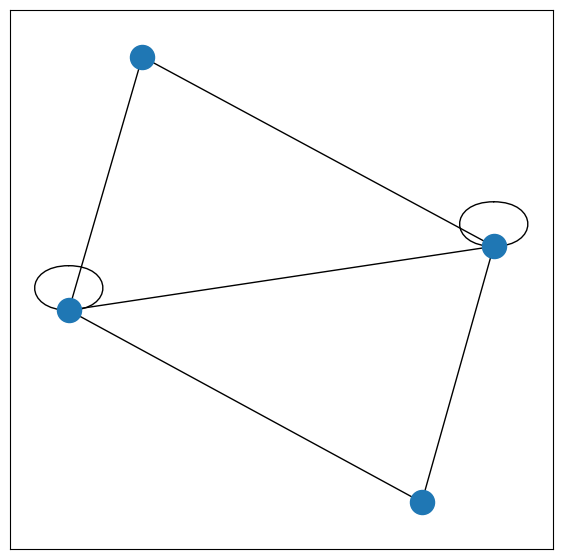

In [20]:


def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

# x: nodes - 3 variables, 2 constraints
x = torch.tensor([[-4,0,0],[-8,0,0],[0,3,0],[0,0,0]])
# [feat_1_1,_feat_1_2,feat_1_3,feat_2_1,feat_2_2 (leq = 0, geq = 1)]
# shape = [number_of_nodes,number_of_features], saved in dim. of H and A, l,u,eq,b,f

edge_index = torch.tensor([[0,1,0,1,2,0,0,3,1,2,3,1],[0,1,1,0,0,2,3,0,2,1,1,3]])
#[2,number_of_edges] -> if undirected: one edge in each direction, saved in H and A

edge_attr = torch.tensor([2,2,1,1,1,1,-1,-1,1,1,2,2]).T
#[number_of_edges,number_of_edge_features] -> saved in H and A

data = Data(x= x, edge_index=edge_index, edge_attr=edge_attr)

# vizualize the graph


G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

KeyError: tensor(0)

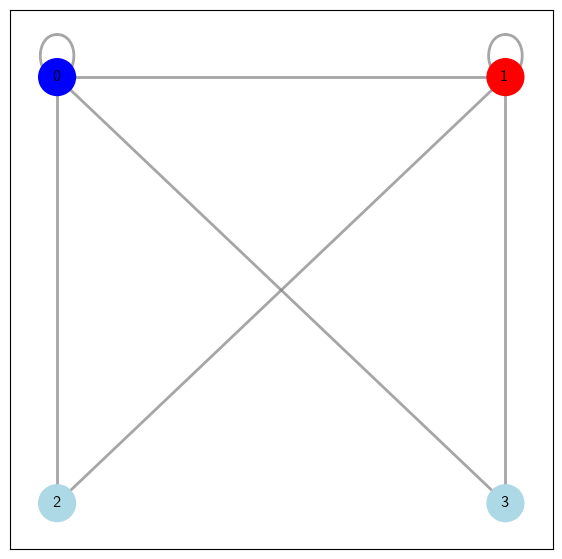

In [22]:
def visualize_graph(G, pos, node_colors, edge_labels):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    
    # Draw the nodes and edges with the specified colors
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap="Set2", node_size=700)
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color='gray')
    
    # Draw the labels for the edges
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    
    # Display edge labels (weights)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.show()

# Create a custom node position
pos = {0: (0, 1), 1: (1, 1), 2: (0, 0), 3: (1, 0)}  # Node positions (manual layout)
node_colors = ['blue', 'red', 'lightblue', 'lightblue']  # Node color for each node

# x: nodes - 3 variables, 2 constraints
x = torch.tensor([[-4,0,0],[-8,0,0],[0,3,0],[0,0,0]])

# Define edges (undirected graph)
edge_index = torch.tensor([[0,1,0,1,2,0,0,3,1,2,3,1],[0,1,1,0,0,2,3,0,2,1,1,3]])

# Edge weights
edge_attr = torch.tensor([2,2,1,1,1,1,-1,-1,1,1,2,2]).T

# Create data object
data = Data(x= x, edge_index=edge_index, edge_attr=edge_attr)

# Convert to NetworkX graph
G = to_networkx(data, to_undirected=True)

# Prepare edge labels (display edge weights)
edge_labels = {(i, j): f'{w.item()}' for i, j, w in zip(edge_index[0], edge_index[1], edge_attr)}

# Visualize the graph with custom layout, colors, and edge weights
visualize_graph(G, pos=pos, node_colors=node_colors, edge_labels=edge_labels)
